In [2]:
import torch
import matplotlib.pyplot as plt

In [64]:
with open("names.txt", 'r') as f:
    words = f.read()

words = words.splitlines()  # splitlines() method splits a string into a list.
print(len(words))
print("min length", min(len(w) for w in words))
print("max length", max(len(w) for w in words))

32033
min length 2
max length 15


In [65]:
# form a bigram
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        bigram = (c1, c2)
        b[bigram] = b.get(bigram, 0) + 1

print(sorted(b.items(), key = lambda v: v[1], reverse=True))

[(('n', '.'), 6763), (('a', '.'), 6640), (('a', 'n'), 5438), (('.', 'a'), 4410), (('e', '.'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('.', 'k'), 2963), (('l', 'e'), 2921), (('e', 'n'), 2675), (('l', 'a'), 2623), (('m', 'a'), 2590), (('.', 'm'), 2538), (('a', 'l'), 2528), (('i', '.'), 2489), (('l', 'i'), 2480), (('i', 'a'), 2445), (('.', 'j'), 2422), (('o', 'n'), 2411), (('h', '.'), 2409), (('r', 'a'), 2356), (('a', 'h'), 2332), (('h', 'a'), 2244), (('y', 'a'), 2143), (('i', 'n'), 2126), (('.', 's'), 2055), (('a', 'y'), 2050), (('y', '.'), 2007), (('e', 'r'), 1958), (('n', 'n'), 1906), (('y', 'n'), 1826), (('k', 'a'), 1731), (('n', 'i'), 1725), (('r', 'e'), 1697), (('.', 'd'), 1690), (('i', 'e'), 1653), (('a', 'i'), 1650), (('.', 'r'), 1639), (('a', 'm'), 1634), (('l', 'y'), 1588), (('.', 'l'), 1572), (('.', 'c'), 1542), (('.', 'e'), 1531), (('j', 'a'), 1473), (('r', '.'), 1377), (('n', 'e'), 1359), (('l', 'l'), 1345), (('i', 'l'), 1345),

In [66]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

stoi["g"]


7

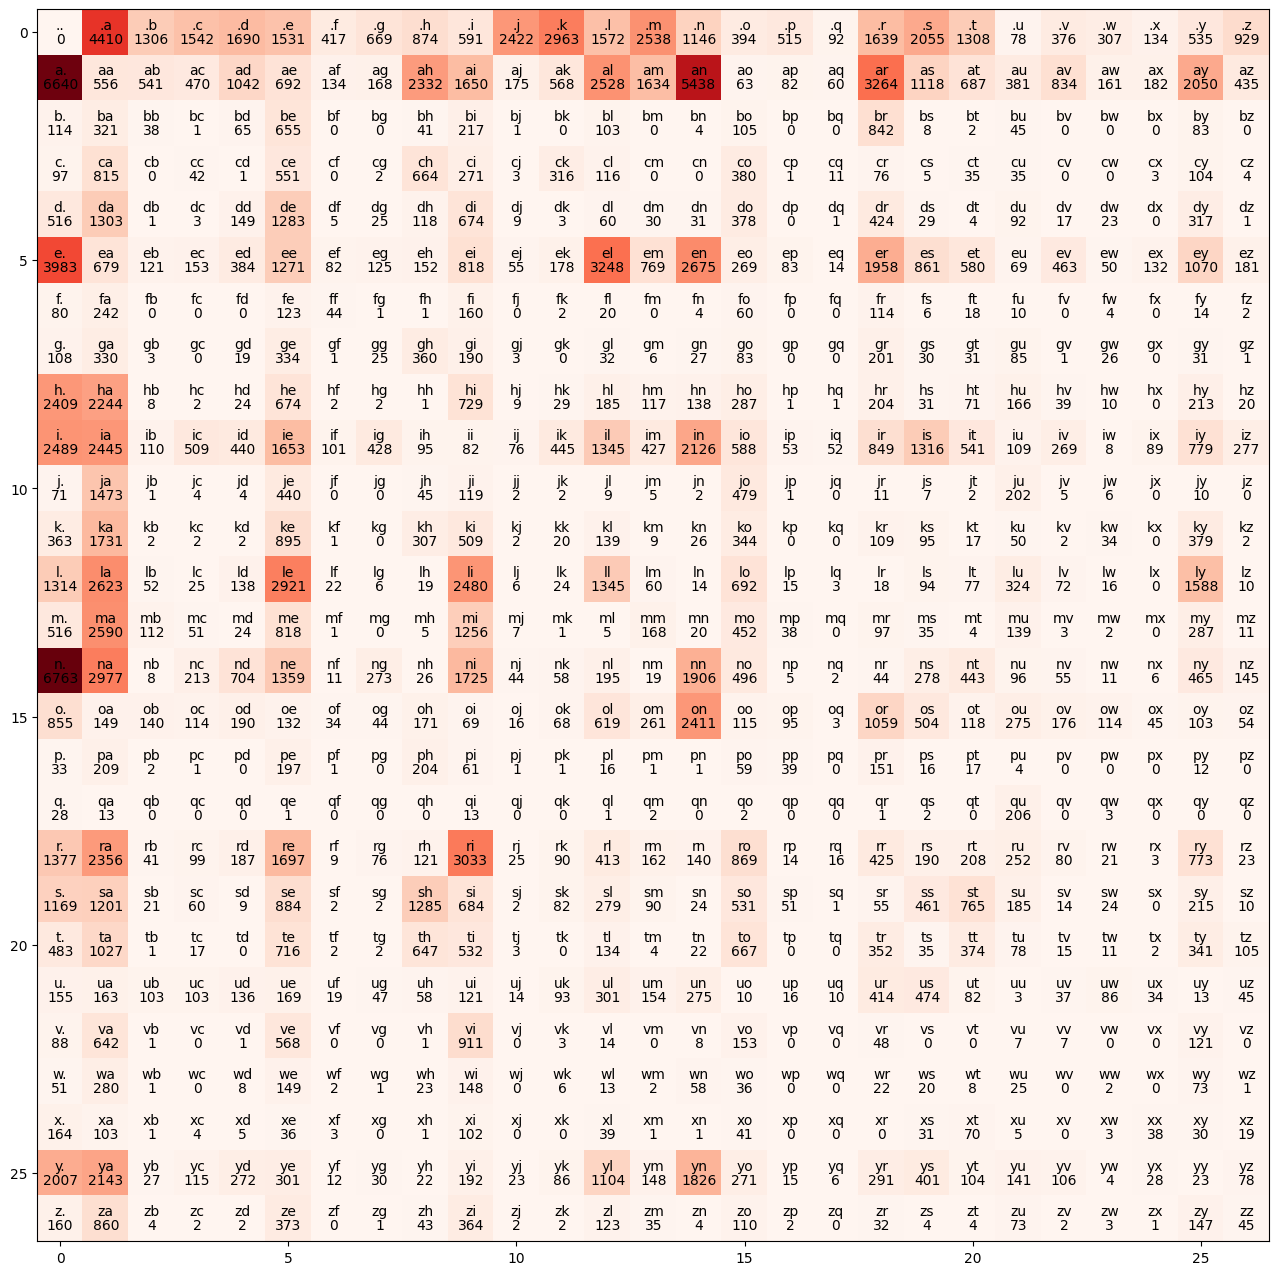

In [67]:
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        ix = stoi[c1]
        iy = stoi[c2]
        N[ix, iy] += 1

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Reds')
for i in range(len(N[0])):
    for j in range(len(N[1])):
        cstr = itos[i] + itos[j]
        plt.text(j, i, cstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black")

In [68]:
# p = N[0].float()
# p0 = p / sum(p)
# print(p0)
# p1 = torch.softmax(p, dim=0)
# print(p1)
# random guess
g = torch.Generator().manual_seed(7777)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        # print(p)
        p = p / sum(p)     # translate into probabilities  
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  # picks the one index from the distribution p
        # print(ix)
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

liai.
l.
c.
kika.
h.
w.
shakya.
kerysonlchile.
ssen.
mi.
jonr.
han.
br.
kidel.
kynghahanicialis.
kifixa.
ca.
ioa.
jamafilila.
arynnyomilla.


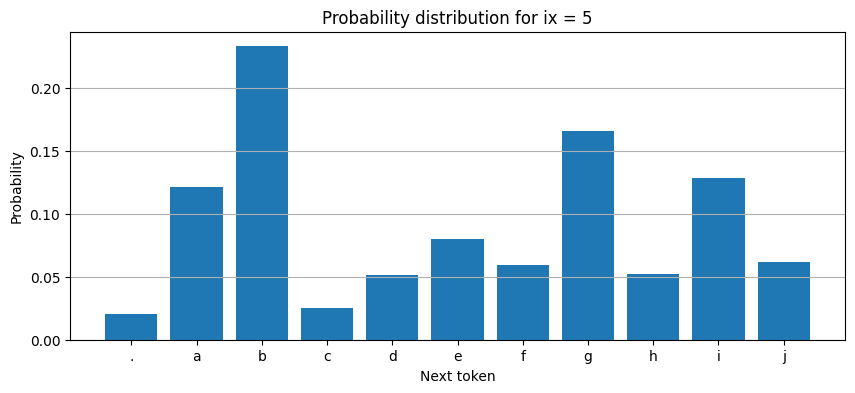

In [ ]:
# import torch
# import matplotlib.pyplot as plt

# # Example vocabulary: '.' followed by 'a' to 'j'
# itos = ['.'] + [chr(i) for i in range(97, 97 + 10)]  # ['.', 'a', 'b', ..., 'j']

# # Simulate a 2D tensor of raw scores (e.g., 10 tokens, vocab size 11)
# torch.manual_seed(7777)
# NN = torch.rand(10, len(itos))  # pretend this is your model output

# # Choose an example index to simulate sampling from
# example_ix = 5

# # Get the probability distribution for this index
# p_raw = NN[example_ix].float()
# p_normalized = p_raw / p_raw.sum()

# # Plot it
# plt.figure(figsize=(10, 4))
# plt.bar(itos, p_normalized.numpy())
# plt.title(f"Probability distribution for ix = {example_ix}")
# plt.xlabel("Next token")
# plt.ylabel("Probability")
# plt.grid(axis='y')
# plt.show()

### NEURAL NET CREATION

In [70]:
# creating the training set

x_train, y_train = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        x_train.append(ix1)
        y_train.append(ix2)

x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

In [72]:
import torch.nn.functional as F 

x_train_encoded = F.one_hot(x_train, num_classes=27).float()
x_train_encoded.shape

torch.Size([5, 27])

In [80]:
P = torch.zeros_like(N, dtype=float)  # same shape, but for floats
for row in range(N.shape[0]):
    p = N[row]
    p = p / sum(p)
    P[row]= p


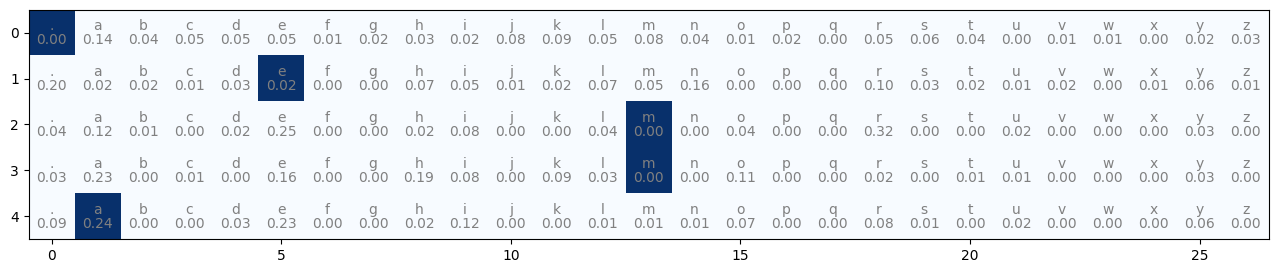

In [81]:
plt.figure(figsize=(16, 16))
plt.imshow(x_train_encoded, cmap='Blues')
for i in range(x_train_encoded.shape[0]):
    for j in range(x_train_encoded.shape[1]):
        cstr = itos[j]
        plt.text(j, i, cstr, ha="center", va="bottom", color="gray")
        v = f"{P[i, j].item():.2f}"
        plt.text(j, i, f"{P[i, j].item():.2f}", ha="center", va="top", color="gray")

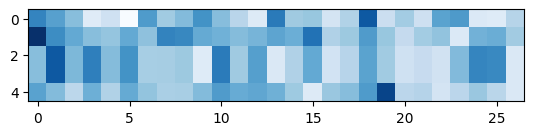

In [86]:
W = torch.randn(27, 27)
output = x_train_encoded @ W
plt.imshow(output, cmap='Blues')

In [ ]:
logits = x_train_encoded @ W
counts = logits.exp()
# probs = counts / counts.sum(1, keepdims=True)  #sum across columns => each row sums to 1
# print(probs)

probs = torch.softmax(logits, dim=1)
# print(smx)
# print(torch.allclose(smx, probs, atol=1e-6))

True


# Negative log for loss calculation

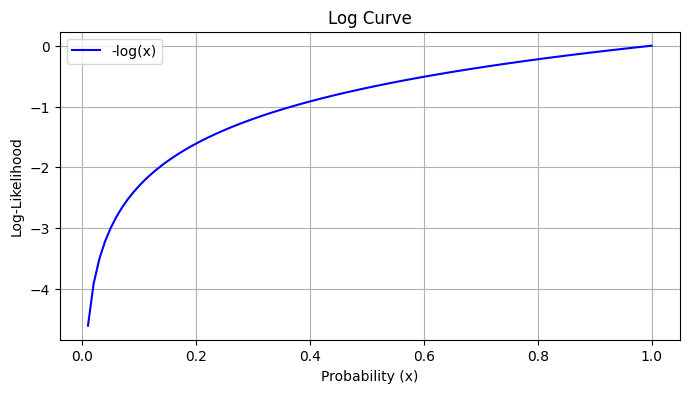

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values between 0.01 and 1 to avoid log(0)
xa = np.linspace(0.01, 1, 100)
ya = np.log(xa)  # Negative log-likelihood

# Plot
plt.figure(figsize=(8, 4))
plt.plot(xa, ya, label='-log(x)', color='blue')
plt.title('Log Curve')
plt.xlabel('Probability (x)')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
"""
The log of a probability (which is always between 0 and 1) is negative or zero:
If the model is very confident (e.g., P = 0.99), then -log(P) is small (~0.01)
If the model is wrong (e.g., P = 0.01), then -log(P) is large (~4.6)
So minimizing negative log-likelihood encourages the model to:
Assign high probability to the correct label
Penalize wrong predictions more severely
"""

nlls = torch.zeros(5)
for i in range(5):
    x = x_train[i].item()
    y = y_train[i].item()
    print(x, y)
    print("probability of next character", probs[i, y])
    p = probs[i, y]
    print("log liklihood", torch.log(p))
    logp = torch.log(p)
    print("negative log liklihood", -logp)
    nlls[i] = -logp

print("average negative log liklihood e.g. loss =", nlls.mean().item())

0 5
probability of next character tensor(0.0028)
log liklihood tensor(-5.8802)
negative log liklihood tensor(5.8802)
5 13
probability of next character tensor(0.0302)
log liklihood tensor(-3.4997)
negative log liklihood tensor(3.4997)
13 13
probability of next character tensor(0.0052)
log liklihood tensor(-5.2681)
negative log liklihood tensor(5.2681)
13 1
probability of next character tensor(0.2041)
log liklihood tensor(-1.5890)
negative log liklihood tensor(1.5890)
1 0
probability of next character tensor(0.0497)
log liklihood tensor(-3.0025)
negative log liklihood tensor(3.0025)
average negative log liklihood e.g. loss = 3.8478946685791016


# Optimization

In [101]:
# randomly assings initial weights
g = torch.Generator().manual_seed(667737)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [109]:
x_train_encoded = F.one_hot(x_train, num_classes=27).float()
logits = x_train_encoded @ W
probs = torch.softmax(logits, dim=1)
loss = -probs[torch.arange(5), y_train].log().mean()
loss

tensor(3.6709, grad_fn=<NegBackward0>)

In [110]:
# W.grad = None  # no gradient data contain.  only weights will remain
loss.backward()

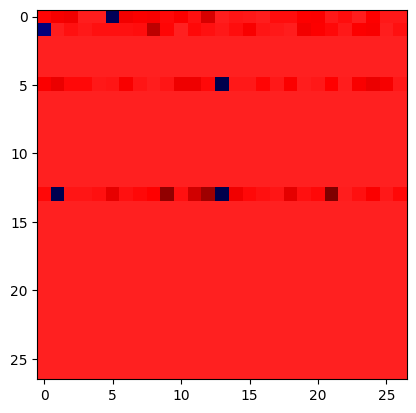

In [ ]:
plt.imshow(W.grad.detach().numpy(), cmap="seismic")
# Red for negative values,
# White near zero,
# Blue for positive values.

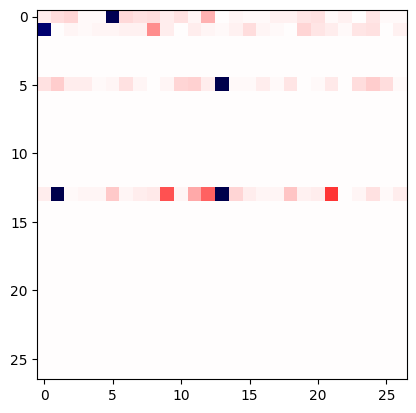

In [ ]:

vmax = torch.abs(W.grad).max().item()
plt.imshow(W.grad.detach().numpy(), cmap="seismic", vmin=-vmax, vmax=vmax)

# This way, you get:
# 🔵 Blue for positive values
# ⚪ White near 0
# 🔴 Red for negative values
# You're early in training, and gradients are vanishing (network might not be learning).

In [116]:
W.data += -0.1 * W.grad
print(loss.item())

3.6708602905273438
